<a href="https://colab.research.google.com/github/pranao0609/MLProject/blob/main/MODEL_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn.metrics as mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

In [5]:
df=pd.read_csv('stud.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X=df.drop(columns=['math score'],axis=1)
y=df['math score']

In [8]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)

In [9]:
X=preprocessor.fit_transform(X)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [11]:
def evaluate_model(true,predicted):
    mae=mean_squared_error.mean_absolute_error(true,predicted)
    mse=mean_squared_error.mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error.mean_squared_error(true,predicted))
    r2_square=mean_squared_error.r2_score(true,predicted)
    return mae,rmse,r2_square

In [12]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor()

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7015
- Mean Absolute Error: 4.5070
- R2 Score: 0.8558
--------------------------

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.854447
7,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.782192
4,DecisionTreeRegressor,0.761053
6,SVR,0.728600


In [14]:
lr=LinearRegression(fit_intercept=True)
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
score=mean_squared_error.r2_score(y_test,y_pred)
print(score)

0.8804332983749564


Text(0, 0.5, 'Predicted')

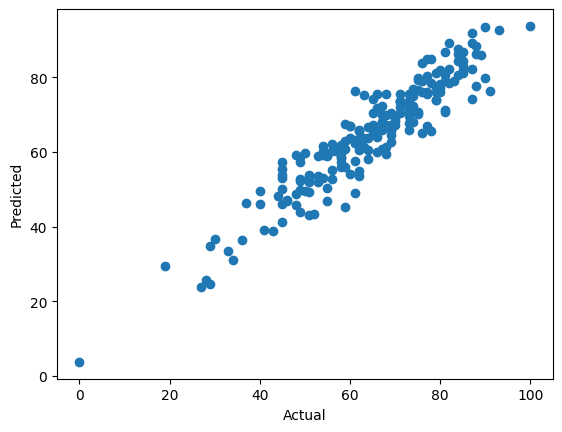

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

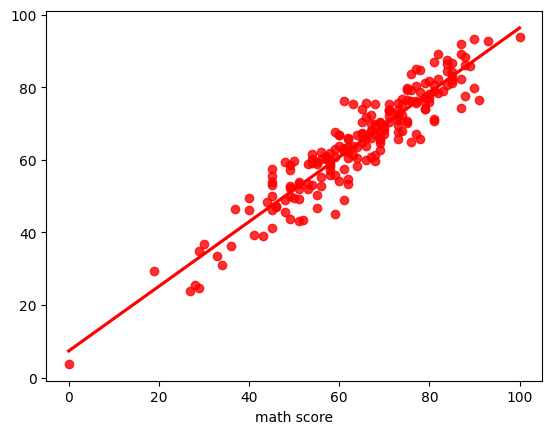

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [17]:
pred=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
